In [1]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyIEEM.models.utils import initialize_epinomic_model

In [3]:
# simulation settings
simulation_start = '2020-03-01'
countries = ['BE','SWE']
colors = ['black', 'red']

# intialise models
prodfunc = 'weakly_critical'
spatial = True
age_classes = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80),(80,120)], closed='left')
models = []
for country in countries:
    models.append(initialize_epinomic_model(country, age_classes, spatial, simulation_start, contact_type='absolute_contacts', prodfunc=prodfunc))

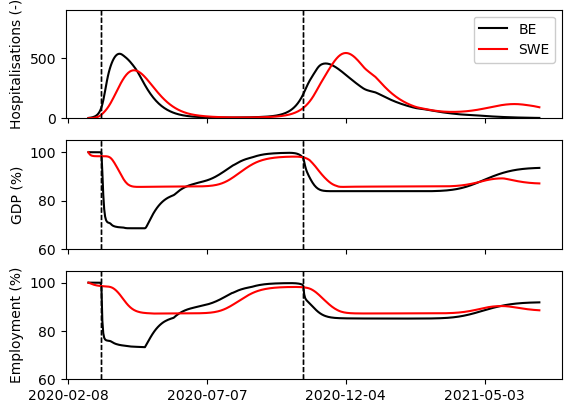

In [8]:
# simulate model
simulation_end = '2021-07-01'

fig, ax = plt.subplots(nrows=3, sharex=True)

for model, color, label in zip(models, colors, countries):
    
    # set a desired parameter set
    theta = [2.40461891e+01, 4.82539554e-01, 5.63209689e-02, 0.05, 3.24334640e-01]
    pars = ['nu', 'xi_eff', 'pi_eff', 'pi_work', 'pi_leisure']
    model.parameters.update(dict(zip(pars, theta)))
    
    # simulate model
    out = model.sim([simulation_start, simulation_end])

    ax[0].plot(out.date, out.Hin.sum(dim=['age_class', 'spatial_unit']), color=color, label=label)
    ax[0].legend(loc=1, framealpha=1)
    ax[0].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[0].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[0].set_ylabel('Hospitalisations (-)')
    ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[0].set_ylim([-1, 900])

    ax[1].plot(out.date, out.x.sum(dim='NACE64')/sum(model.parameters['x_0'])*100, color=color, label=label)
    ax[1].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[1].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[1].set_ylabel('GDP (%)')
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[1].set_ylim([60, 105])

    ax[2].plot(out.date, out.l.sum(dim='NACE64')/sum(model.parameters['l_0'])*100, color=color, label=label)
    ax[2].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[2].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[2].set_ylabel('Employment (%)')
    ax[2].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[2].set_ylim([60, 105])

plt.savefig(f'epinomic.png', dpi=400)
plt.show()
plt.close()

In [ ]:
https://www.scb.se/en/finding-statistics/statistics-by-subject-area/labour-market/labour-force-surveys/labour-force-surveys-lfs/pong/statistical-news/labour-force-surveys-lfs-may-2020/